In [135]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""
Python standard packages
"""
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
"""
packages for dataload and simulation
"""
import ffn # data access
from arch import arch_model  # simulation
from arch.univariate import SkewStudent, GARCH, EGARCH, ARX
"""
Own packages
"""
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
sys.path.insert(0, "C:\\Users\\lucas\\OneDrive\\Skrivebord\\repo\\speciale\\") # ljb path

import codelib  # used for extending pandas
from codelib.stats import weighted_kurtosis, weighted_skew, weighted_mean, weighted_variance
from codelib.plotting import dist_vs_normal_plot, volume_contribution_plot, DefaultStyle, default_colors
sns.set_theme("paper","whitegrid")
DefaultStyle()
"""
ignore warnings
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [635]:
rf_data = np.load('rl_market_experiment_data_dropout_new_loss_1205.npy',allow_pickle='TRUE').item()
save_count = 10
time_periods = 500
end_episode = 1500

In [638]:
rolling_mean_volumes = rf_data['volumes'][:50,:,:].mean(axis = (0))
#a.mean(axis=(1,2))

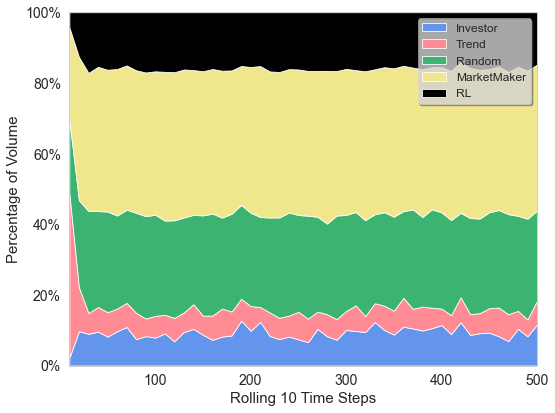

In [640]:
time_points = np.linspace(save_count, time_periods, int(time_periods / save_count))
fig, ax = plt.subplots(figsize = (8, 6))
#volume_contribution_plot(time_points, rf_data['volumes'][-1,:,:], ax = ax, n_ticks = save_count,  rl_agent = True)
volume_contribution_plot(time_points, rolling_mean_volumes, ax = ax, n_ticks = save_count,  rl_agent = True)
volume_name = "volume_graph_first_50_1500_epi"
ax.tick_params(axis='both', which='major', labelsize=14)
plt.rc('axes', labelsize=15)
fig.tight_layout()
plt.savefig(f"plots/{volume_name}_ljb.png")

In [574]:
rf_data.keys()
plt.rcParams.update({'font.size': 16})

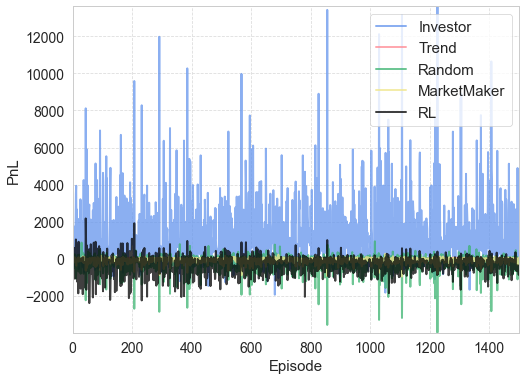

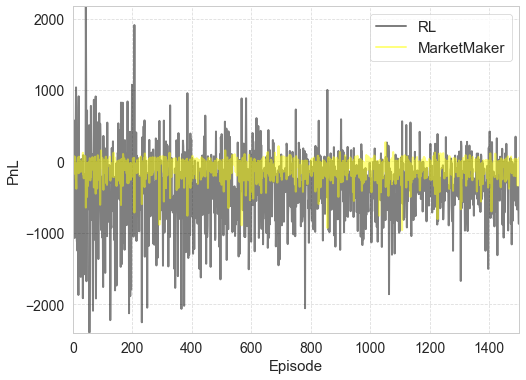

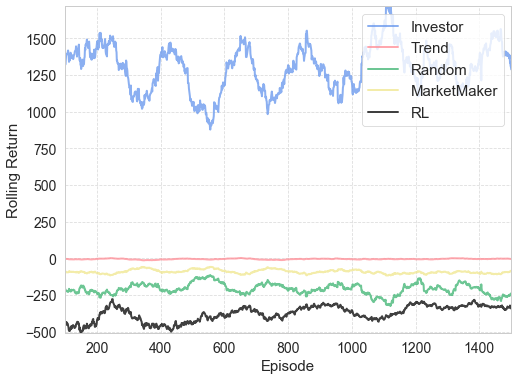

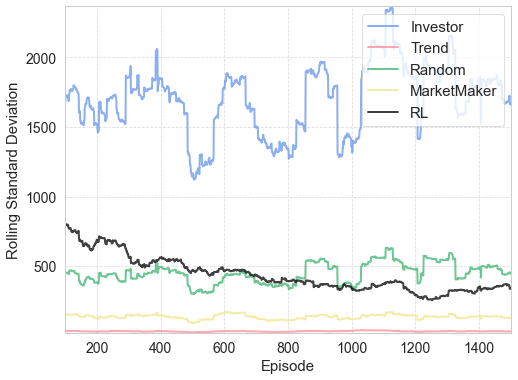

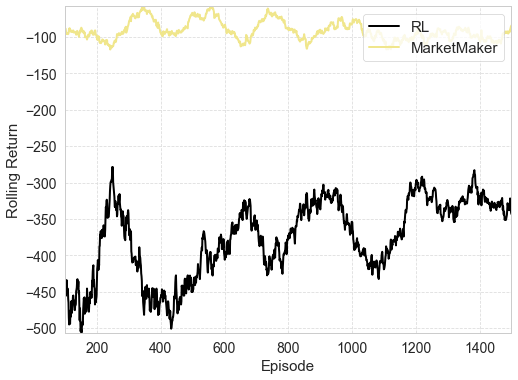

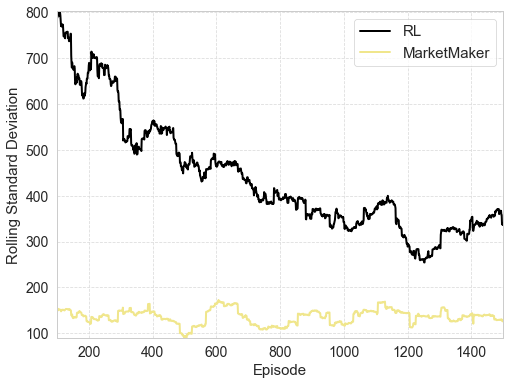

In [585]:
time_points = np.linspace(0, end_episode, end_episode)
fig, ax = plt.subplots(figsize = (8, 6))
color_agents = list(default_colors.values())[:5]
labs = ["Investor", "Trend", "Random", "MarketMaker", "RL"]
for j in range(5):
    ax.plot(time_points, rf_data['pnls'][:end_episode,j, -1], label = labs[j], alpha = 0.75,
           color = color_agents[j])
ax.set(xlabel = "Episode", ylabel = "PnL")
ax.legend(loc = 'upper right')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.rc('axes', labelsize=15)
plt.savefig("plots/returns_all_episodes_1500_epi.png")

fig, ax = plt.subplots(figsize = (8, 6))
labs = ["MarketMaker", "RL"]
color_mm_rl = ['yellow' , 'black']
for j in reversed(range(2)):
    ax.plot(time_points, rf_data['pnls'][:end_episode,j+3, -1], label = labs[j],
           alpha = 0.5, color = color_mm_rl[j])
ax.set(xlabel = "Episode", ylabel = "PnL")
ax.legend(loc = 'upper right')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("plots/returns_all_episodes_ljb_mm_rl_1500_epi.png")

labs = ["Investor", "Trend", "Random", "MarketMaker", "RL"]
fig, ax = plt.subplots(figsize = (8, 6))
for j in range(5):
    dat = pd.DataFrame(rf_data['pnls'][:end_episode,j, -1])
    rolling_windows = dat.rolling(100, min_periods=100)
    rolling_mean = rolling_windows.mean().values
    rolling_sd = rolling_windows.std().values
    rolling_sr = rolling_mean / rolling_sd
    ax.plot(time_points[:], rolling_mean, label = labs[j],
           alpha = 0.75)
ax.set(xlabel = "Episode", ylabel = "Rolling Return")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc = 'upper right')
plt.savefig("plots/mean_return_rolling_100_1500_epi.png")

labs = ["Investor", "Trend", "Random", "MarketMaker", "RL"]
fig, ax = plt.subplots(figsize = (8, 6))
for j in range(5):
    dat = pd.DataFrame(rf_data['pnls'][:end_episode,j, -1])
    rolling_windows = dat.rolling(100, min_periods=100)
    rolling_mean = rolling_windows.mean().values
    rolling_sd = rolling_windows.std().values
    rolling_sr = rolling_mean / rolling_sd
    ax.plot(time_points[:], rolling_sd, label = labs[j], alpha = 0.75)
ax.set(xlabel = "Episode", ylabel = "Rolling Standard Deviation")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc = 'upper right')
plt.savefig("plots/sd_rolling_100_1500_epi.png")

######## MM VS RL ###########
labs = ["MarketMaker", "RL"]
fig, ax = plt.subplots(figsize = (8, 6))
for j in reversed(range(2)):
    dat = pd.DataFrame(rf_data['pnls'][:end_episode,j+3, -1])
    rolling_windows = dat.rolling(100, min_periods=100)
    rolling_mean = rolling_windows.mean().values
    rolling_sd = rolling_windows.std().values
    rolling_sr = rolling_mean / rolling_sd
    ax.plot(time_points[:], rolling_mean, label = labs[j],
           alpha = 1, color = color_agents[j+3])
ax.set(xlabel = "Episode", ylabel = "Rolling Return")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc = 'upper right')
plt.savefig("plots/mean_return_mm_rl_rolling_100_1500_epi.png")

fig, ax = plt.subplots(figsize = (8, 6))
for j in reversed(range(2)):
    dat = pd.DataFrame(rf_data['pnls'][:end_episode,j+3, -1])
    rolling_windows = dat.rolling(100, min_periods=100)
    rolling_mean = rolling_windows.mean().values
    rolling_sd = rolling_windows.std().values
    rolling_sr = rolling_mean / rolling_sd
    ax.plot(time_points[:], rolling_sd, label = labs[j], alpha = 1, color = color_agents[j+3])
ax.set(xlabel = "Episode", ylabel = "Rolling Standard Deviation")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc = 'upper right')
plt.savefig("plots/sd_mm_rl_rolling_100_1500_epi.png")

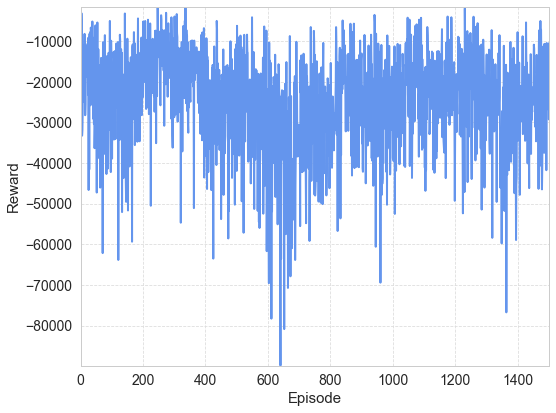

In [616]:
all_rewards = rf_data['end_rewards'][:end_episode]
fig, ax = plt.subplots(figsize = (8, 6))
plt.plot(all_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
ax.tick_params(axis='both', which='major', labelsize=14)
plt.rc('axes', labelsize=15)
fig.tight_layout()
#plt.savefig("plots/reward_1500_epi.png")

# RL POSITION

In [476]:
rf_data['positions'].mean(axis = 1)

array([ 86.756,  68.638, 110.102, ...,  54.004,  47.464,  30.272])

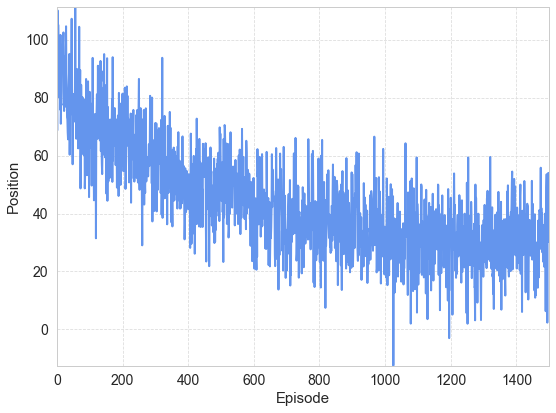

In [614]:
fig, ax = plt.subplots(figsize = (8, 6))
all_position = rf_data['positions'].mean(axis = 1)#rf_data['positions'][:end_episode,-1]
plt.plot(all_position)
plt.xlabel("Episode")
plt.ylabel("Position")
ax.tick_params(axis='both', which='major', labelsize=14)
plt.rc('axes', labelsize=15)
fig.tight_layout()
plt.savefig("plots/pos_1500_epi.png")

# RL EXECUTED TRADES

In [259]:
all_executed = rf_data['positions'][:end_episode,:] * rf_data['total_volumes'][:end_episode, :]
rf_data['volumes'][end_episode-10:end_episode,:,:]

ValueError: operands could not be broadcast together with shapes (1000,500) (1000,50) 

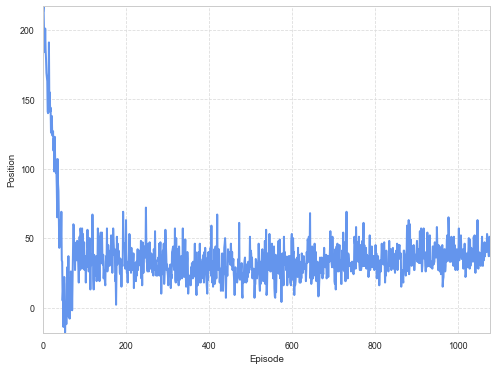

In [61]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.plot(all_position)
plt.xlabel("Episode")
plt.ylabel("Position")
#plt.savefig("plots/pos_1000_epi.png")

# RL LOSS FUNCTION

In [78]:
loss_episodes_first = np.linspace(0, 199, int((199)/5), dtype=int)

In [261]:
loss_episodes_last = np.linspace(0, end_episode-1, int((end_episode-1)/5)+1, dtype=int)

In [641]:
#pol_first = rf_data_first['policy_loss']
#pol_loss = [pol_loss[i] for i in range(len(rf_data['policy_loss']))]
#pol_first = [item for sublist in pol_first for item in sublist]
pol_last = rf_data['policy_loss']
pol_last = [item for sublist in pol_last for item in sublist]
pol_loss = pol_last

#qf_first = rf_data_first['qf_loss']
#qf_loss = [qf_loss[i] for i in range(len(rf_data['policy_loss']))]
#qf_first = [item for sublist in qf_first for item in sublist]
qf_last = rf_data['qf_loss']
qf_last = [item for sublist in qf_last for item in sublist]
qf_loss = qf_last

#vf_first = rf_data_first['vf_loss']
#vf_loss = [vf_loss[i] for i in range(len(rf_data['policy_loss']))]
#vf_first = [item for sublist in vf_first for item in sublist]
vf_last = rf_data['vf_loss']
vf_last = [item for sublist in vf_last for item in sublist]
vf_loss = vf_last

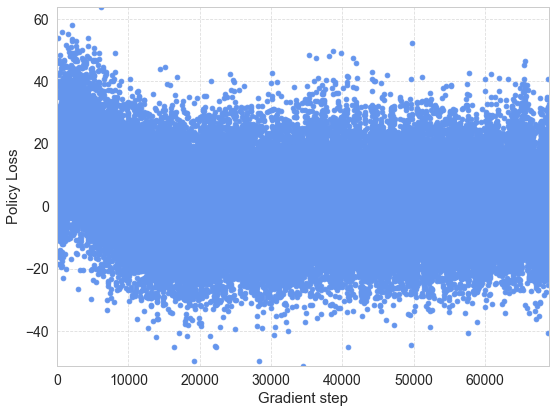

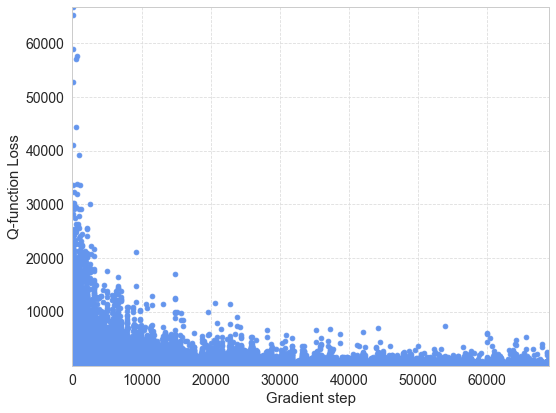

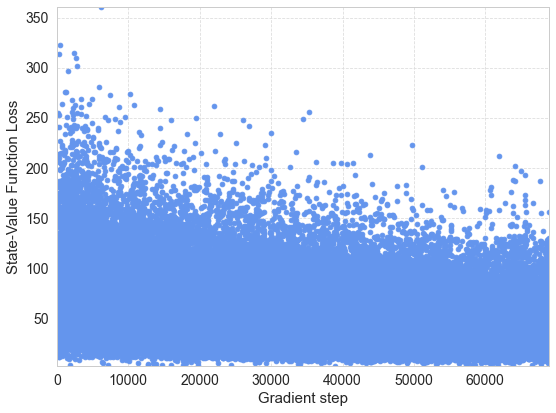

In [642]:
# pol_loss = rf_data_first['policy_loss'][:200]
# pol_loss = [item for sublist in pol_loss for item in sublist]

# qf_loss = rf_data_first['qf_loss'][:200]
# qf_loss = [item for sublist in qf_loss for item in sublist]

# vf_loss = rf_data_first['vf_loss'][:200]
# vf_loss = [item for sublist in vf_loss for item in sublist]

fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(y = pol_loss, x = np.linspace(0, len(pol_loss), len(pol_loss)))
#plt.title("Episode policy_loss")
ax.tick_params(axis='both', which='major', labelsize=14)
plt.rc('axes', labelsize=15)
plt.xlabel("Gradient step")
plt.ylabel("Policy Loss")
#plt.ylim(-3000, 100)
fig.tight_layout()
plt.savefig("plots/policy_loss_1500_epi.png")
plt.show()
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(y = qf_loss, x = np.linspace(0, len(qf_loss), len(qf_loss)))
#plt.title("Episode qf_loss")
ax.tick_params(axis='both', which='major', labelsize=14)
plt.rc('axes', labelsize=15)
plt.xlabel("Gradient step")
plt.ylabel("Q-function Loss")
fig.tight_layout()
plt.savefig("plots/qf_loss_1500_epi.png")
plt.show()
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(y = vf_loss, x = np.linspace(0, len(vf_loss), len(vf_loss)))
#plt.title("Episode vf_loss")
ax.tick_params(axis='both', which='major', labelsize=14)
plt.rc('axes', labelsize=15)
plt.xlabel("Gradient step")
plt.ylabel("State-Value Function Loss")
fig.tight_layout()
plt.savefig("plots/vf_loss_1500_epi.png")
plt.show()

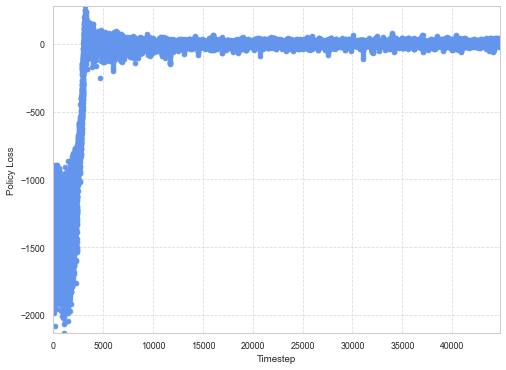

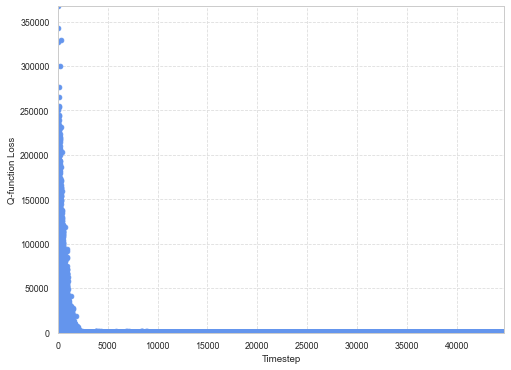

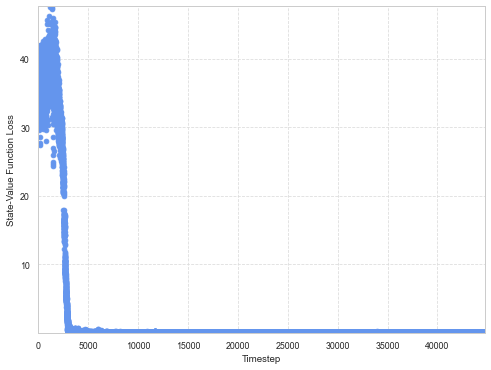

In [199]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(y = pol_loss, x = np.linspace(0, len(pol_loss), len(pol_loss)))
#plt.title("Episode policy_loss")
plt.xlabel("Timestep")
plt.ylabel("Policy Loss")
#plt.ylim(-3000, 100)
#plt.savefig("plots/policy_loss_30k.png")
plt.show()
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(y = qf_loss, x = np.linspace(0, len(qf_loss), len(qf_loss)))
#plt.title("Episode qf_loss")
plt.xlabel("Timestep")
plt.ylabel("Q-function Loss")
#plt.savefig("plots/qf_loss_30k.png")
plt.show()
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(y = vf_loss, x = np.linspace(0, len(vf_loss), len(vf_loss)))
#plt.title("Episode vf_loss")
plt.xlabel("Timestep")
plt.ylabel("State-Value Function Loss")
#plt.savefig("plots/vf_loss_30k.png")
plt.show()

# RL FINAL EXPERIMENT RESULTS

In [624]:
rf_data = np.load('rl_market_experiment_data_dropout_new_loss_1205.npy',allow_pickle='TRUE').item()
rf_data_first = np.load('rl_market_experiment_data_dropout_new_loss_1205_pt2.npy',allow_pickle='TRUE').item()
rf_data_sec = np.load('rl_market_experiment_data_dropout_new_loss_1205_pt3.npy',allow_pickle='TRUE').item()
rf_data_last = np.load('rl_market_experiment_data_dropout_new_loss_1205_pt4.npy',allow_pickle='TRUE').item()
save_count = 10
time_periods = 500
end_episode = 1500

In [33]:
rolling_mean = rf_data['volumes'][end_episode-10:end_episode,:,:].mean(axis = (0))
#a.mean(axis=(1,2))

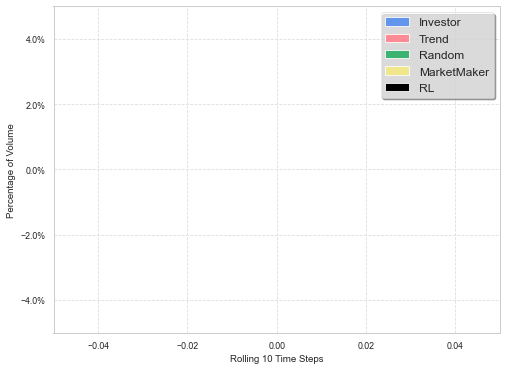

In [535]:
time_points = np.linspace(save_count, time_periods, int(time_periods / save_count))
fig, ax = plt.subplots(figsize = (8, 6))
#volume_contribution_plot(time_points, rf_data['volumes'][-1,:,:], ax = ax, n_ticks = save_count,  rl_agent = True)
volume_contribution_plot(time_points, rolling_mean, ax = ax, n_ticks = save_count,  rl_agent = True)
volume_name = "volume_graph_last_10"
#plt.savefig(f"plots/{volume_name}_ljb.png")

In [35]:
rf_data.keys()

dict_keys(['volumes', 'pnls', 'end_rewards', 'vf_loss', 'qf_loss', 'policy_loss', 'positions', 'total_volumes'])

In [368]:
dat = pd.DataFrame(np.append(rf_data_first['pnls'][:,j+3, -1],rf_data['pnls'][:end_episode,j+3, -1]))
rolling_windows = dat.rolling(10, min_periods=1)
rolling_mean = rolling_windows.var().values
rolling_sd = rolling_windows.std().values
rolling_sr = rolling_mean / rolling_sd

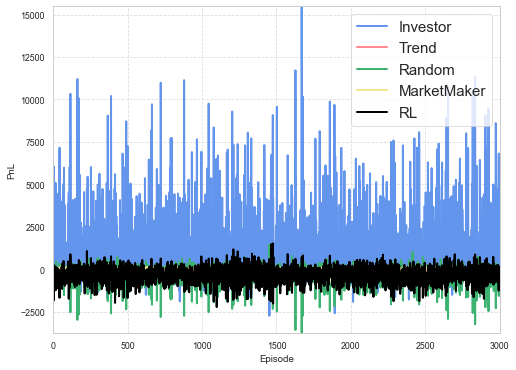

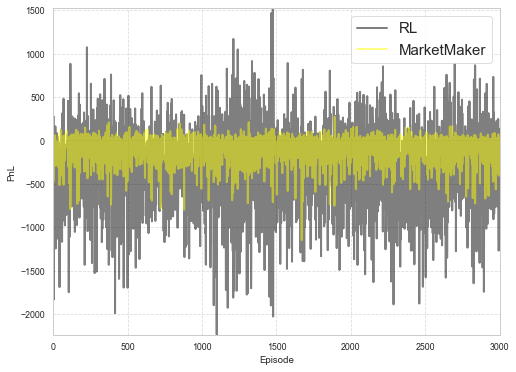

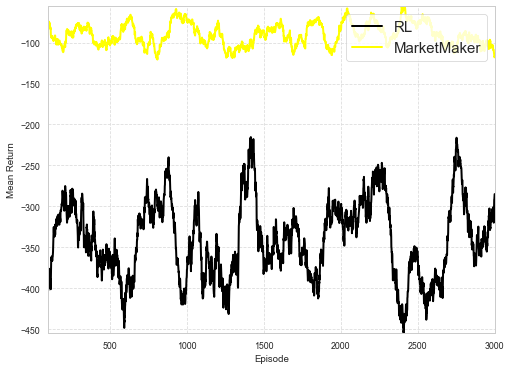

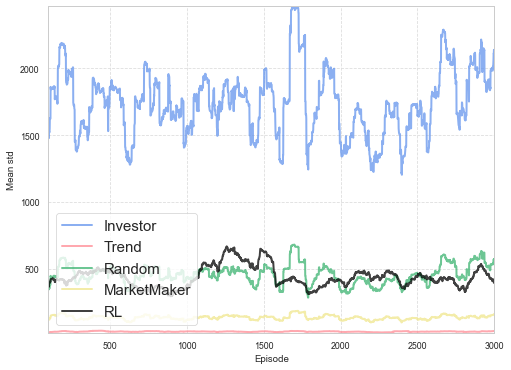

In [536]:
time_points = np.linspace(0, end_episode*2, end_episode*2)
fig, ax = plt.subplots(figsize = (8, 6))
labs = ["Investor", "Trend", "Random", "MarketMaker", "RL"]
for j in range(5):
    ax.plot(time_points, np.append(rf_data_first['pnls'][:,j, -1],rf_data['pnls'][:end_episode,j, -1]), label = labs[j])
ax.set(xlabel = "Episode", ylabel = "PnL")
ax.legend(loc = 'upper right')
#plt.savefig("plots/returns_all_episodes_ljb.png")

fig, ax = plt.subplots(figsize = (8, 6))
labs = ["MarketMaker", "RL"]
color_mm_rl = ['yellow' , 'black']
for j in reversed(range(2)):
    ax.plot(time_points, np.append(rf_data_first['pnls'][:,j+3, -1],rf_data['pnls'][:end_episode,j+3, -1]), label = labs[j],
           alpha = 0.5, color = color_mm_rl[j])
ax.set(xlabel = "Episode", ylabel = "PnL")
ax.legend(loc = 'upper right')
#plt.savefig("plots/returns_all_episodes_ljb_mm_rl.png")

fig, ax = plt.subplots(figsize = (8, 6))
for j in reversed(range(2)):
    dat = pd.DataFrame(np.append(rf_data_first['pnls'][:,j+3, -1],rf_data['pnls'][:end_episode,j+3, -1]))
    rolling_windows = dat.rolling(100, min_periods=100)
    rolling_mean = rolling_windows.mean().values
    rolling_sd = rolling_windows.std().values
    rolling_sr = rolling_mean / rolling_sd
    ax.plot(time_points[:], rolling_mean, label = labs[j],
           alpha = 1, color = color_mm_rl[j])
ax.set(xlabel = "Episode", ylabel = "Mean Return")
ax.legend(loc = 'upper right')
#plt.savefig("plots/mean_return_mm_rl_rolling_100.png")

labs = ["Investor", "Trend", "Random", "MarketMaker", "RL"]
fig, ax = plt.subplots(figsize = (8, 6))
for j in range(5):
    dat = pd.DataFrame(np.append(rf_data_first['pnls'][:,j, -1],rf_data['pnls'][:end_episode,j, -1]))
    rolling_windows = dat.rolling(100, min_periods=100)
    rolling_mean = rolling_windows.mean().values
    rolling_sd = rolling_windows.std().values
    rolling_sr = rolling_mean / rolling_sd
    ax.plot(time_points[:], rolling_sd, label = labs[j], alpha = 0.75)
ax.set(xlabel = "Episode", ylabel = "Mean std")
ax.legend(loc = 'lower left')
#plt.savefig("plots/mean_return_mm_rl_rolling_100.png")

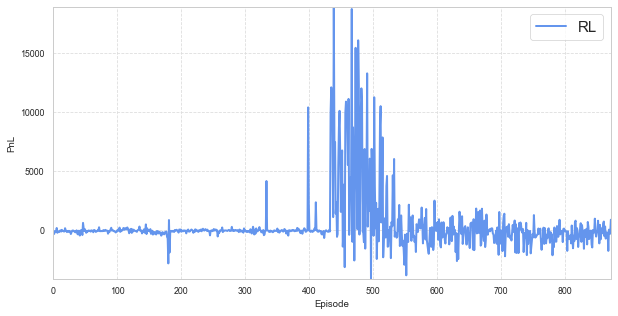

In [143]:
time_points = np.linspace(0, end_episode, end_episode)
fig, ax = plt.subplots(figsize = (10, 5))
labs = ["RL"]
ax.plot(time_points, rf_data['pnls'][:end_episode,-1, -1], label = labs[0])
ax.set(xlabel = "Episode", ylabel = "PnL")
ax.legend()

In [629]:
all_rewards = np.append(rf_data['end_rewards'], rf_data_first['end_rewards'])
#all_rewards = np.append(all_rewards,  rf_data_sec['end_rewards'])
#all_rewards = np.append(all_rewards,  rf_data_last['end_rewards'])

Text(0, 0.5, 'Reward')

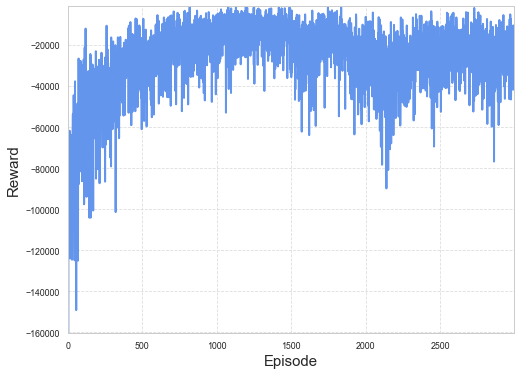

In [630]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.plot(all_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
#plt.ylim(-350000, 10000)
#plt.savefig("plots/reward_1000_epi.png")

# RL POSITION

Text(0, 0.5, 'Position')

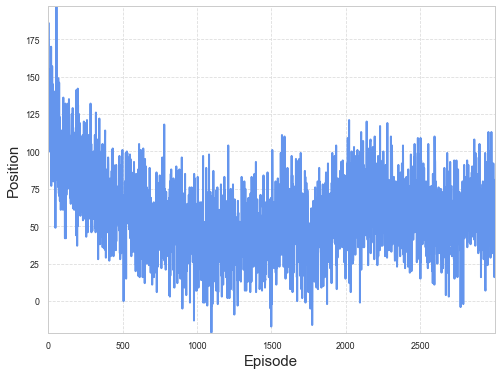

In [623]:
fig, ax = plt.subplots(figsize = (8, 6))
all_position = np.append(rf_data['positions'][:,-1], rf_data_first['positions'][:end_episode,-1])
plt.plot(all_position)
plt.xlabel("Episode")
plt.ylabel("Position")
#plt.savefig("plots/pos_1000_epi.png")

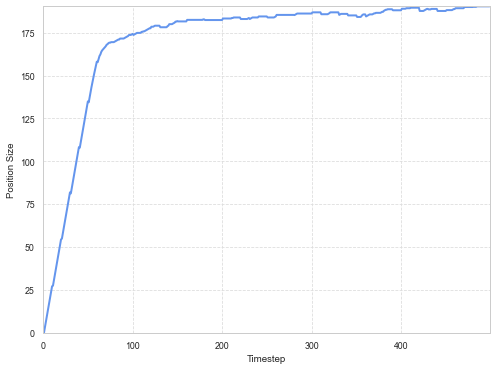

In [243]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.plot(rf_data['positions'][:end_episode][:10,:].mean(axis = 0))
#plt.title("Episode qf_loss")
plt.xlabel("Timestep")
plt.ylabel("Position Size")
plt.savefig("plots/rf_10_first_epi_position.png")
plt.show()

# RL EXECUTED TRADES

In [238]:
all_executed = rf_data['positions'][:end_episode,:] * rf_data['total_volumes'][:end_episode, :]
rf_data['volumes'][end_episode-10:end_episode,:,:]

ValueError: operands could not be broadcast together with shapes (878,500) (878,50) 

Text(0, 0.5, 'Position')

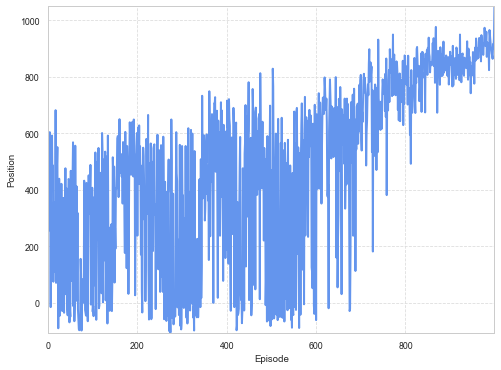

In [286]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.plot(all_position)
plt.xlabel("Episode")
plt.ylabel("Position")
#plt.savefig("plots/pos_1000_epi.png")

# RL LOSS FUNCTION

In [304]:
loss_episodes_first = np.linspace(0, 199, int((199)/5), dtype=int)

In [305]:
loss_episodes_last = np.linspace(0, end_episode-1, int((end_episode-1)/5)+1, dtype=int)

In [633]:
pol_first = rf_data['policy_loss']
#pol_loss = [pol_loss[i] for i in range(len(rf_data['policy_loss']))]
pol_first = [item for sublist in pol_first for item in sublist]
pol_last = rf_data_first['policy_loss']
pol_last = [item for sublist in pol_last for item in sublist]
pol_loss = pd.DataFrame(pol_first).append(pd.DataFrame(pol_last))

qf_first = rf_data['qf_loss']
#qf_loss = [qf_loss[i] for i in range(len(rf_data['policy_loss']))]
qf_first = [item for sublist in qf_first for item in sublist]
qf_last = rf_data_first['qf_loss']
qf_last = [item for sublist in qf_last for item in sublist]
qf_loss = pd.DataFrame(qf_first).append(pd.DataFrame(qf_last))

vf_first = rf_data['vf_loss']
#vf_loss = [vf_loss[i] for i in range(len(rf_data['policy_loss']))]
vf_first = [item for sublist in vf_first for item in sublist]
vf_last = rf_data_first['vf_loss']
vf_last = [item for sublist in vf_last for item in sublist]
vf_loss = pd.DataFrame(vf_first).append(pd.DataFrame(vf_last))

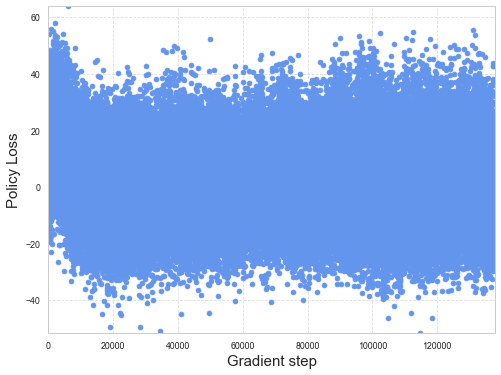

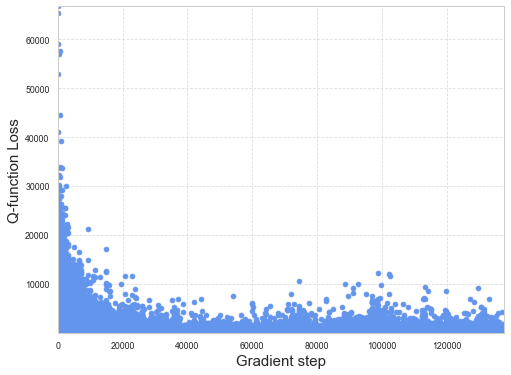

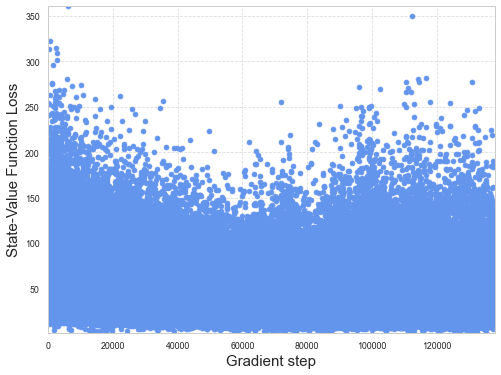

In [634]:
# pol_loss = rf_data_first['policy_loss'][:200]
# pol_loss = [item for sublist in pol_loss for item in sublist]

# qf_loss = rf_data_first['qf_loss'][:200]
# qf_loss = [item for sublist in qf_loss for item in sublist]

# vf_loss = rf_data_first['vf_loss'][:200]
# vf_loss = [item for sublist in vf_loss for item in sublist]

fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(y = pol_loss, x = np.linspace(0, len(pol_loss), len(pol_loss)))
#plt.title("Episode policy_loss")
plt.xlabel("Gradient step")
plt.ylabel("Policy Loss")
#plt.ylim(-3000, 100)
#plt.savefig("plots/policy_loss_40k.png")
plt.show()
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(y = qf_loss, x = np.linspace(0, len(qf_loss), len(qf_loss)))
#plt.title("Episode qf_loss")
plt.xlabel("Gradient step")
plt.ylabel("Q-function Loss")
plt.savefig("plots/qf_loss_40k.png")
plt.show()
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(y = vf_loss, x = np.linspace(0, len(vf_loss), len(vf_loss)))
#plt.title("Episode vf_loss")
plt.xlabel("Gradient step")
plt.ylabel("State-Value Function Loss")
#plt.savefig("plots/vf_loss_40k.png")
plt.show()

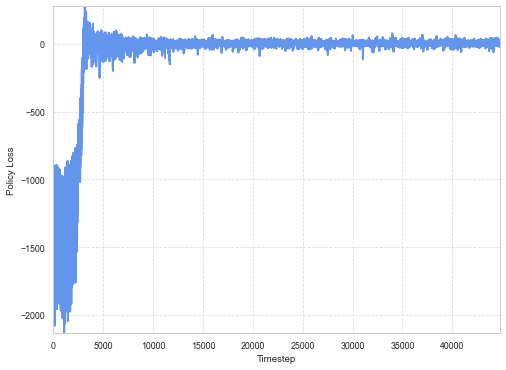

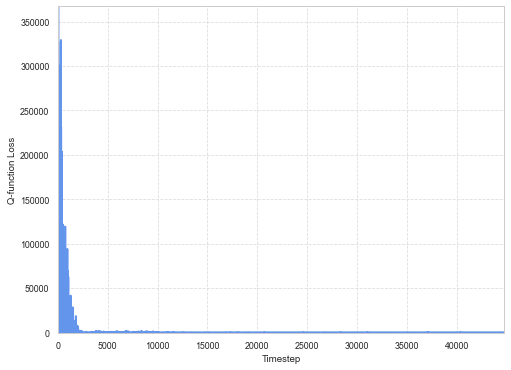

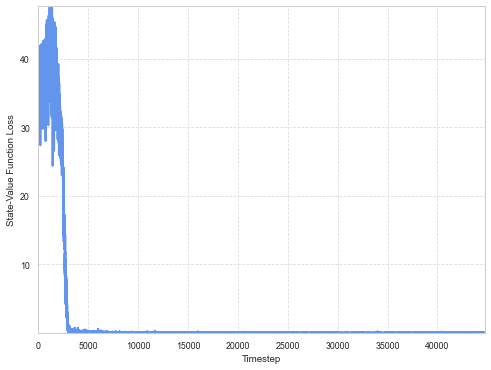

In [330]:
fig, ax = plt.subplots(figsize = (8, 6))
#plt.scatter(y = pol_loss, x = np.linspace(0, len(pol_loss), len(pol_loss)))
plt.plot(pol_loss.values)
#plt.title("Episode policy_loss")
plt.xlabel("Timestep")
plt.ylabel("Policy Loss")
#plt.ylim(-3000, 100)
#plt.savefig("plots/policy_loss_30k.png")
plt.show()
fig, ax = plt.subplots(figsize = (8, 6))
#plt.scatter(y = qf_loss, x = np.linspace(0, len(qf_loss), len(qf_loss)))
plt.plot(qf_loss.values)
#plt.title("Episode qf_loss")
plt.xlabel("Timestep")
plt.ylabel("Q-function Loss")
#plt.savefig("plots/qf_loss_30k.png")
plt.show()
fig, ax = plt.subplots(figsize = (8, 6))
#plt.scatter(y = vf_loss, x = np.linspace(0, len(vf_loss), len(vf_loss)))
plt.plot(vf_loss.values)
#plt.title("Episode vf_loss")
plt.xlabel("Timestep")
plt.ylabel("State-Value Function Loss")
#plt.savefig("plots/vf_loss_30k.png")
plt.show()